In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcol
import matplotlib.cm as cm
import math
import time
import cv2
from itertools import cycle
filename="20180413_3.bin" #this data set is an extremely short video recorded with a hand held d435
cycol = cycle('bgrcmk') #here I'm generating a list of colors I can plot

In [2]:
!wc -c "20180413_3.bin" #this is a unix command to get the number of bytes in a binary file. Because our data is uint16, each pixel is two bytes

 18723025920 20180413_3.bin


In [5]:
height=480
width=848
rawframes = np.fromfile(filename, dtype=np.uint16) #A highly efficient way of reading binary data with a known data-type, as well as parsing simply formatted text files. Data written using the tofile method can be read using this function.
frames = rawframes.reshape(-1, height, width) #.reshape simply restructures data into dimensions of your choosing. -1 means find the number of segments that structures the data into the dimnesions shown afterwards

In [7]:
number_of_frames,video_height,video_width=frames.shape[0],frames.shape[1],frames.shape[2];
#set number of frames equal to the first element in reshaped.shape
#set video height to the second element in reshaped.shape
#set video width to the third element in reshaped.shape
print('The shape of the video is {0} by {1} and it has {2} frames'.format(video_height,video_width,number_of_frames))
#note that the nubmers below are one greater than the actual indices that exist
#there is no reshaped[number_of_frames,height,width], the last frame is reshaped[number_of_frames-1,height-1,width-1]

The shape of the video is 480 by 848 and it has 22999 frames


In [ ]:
#Choose a random pixel to look at
#Here I create np.array containing the value of a single pixel over all the frames of the data
#first, I choose a pixel
rand_height=random.randint(0,video_height-1) #random pixel's height is between 0 and the height of the video
rand_width=random.randint(0,video_width-1) #random pixel's width is between 0 and the width of the video

random_pixel_values_over_time=[] #first I create an empty array
for a_frame in range(number_of_frames): #the for loop starts at the first index and goes until for the number of frames
    current_pixel_value=frames[a_frame,rand_height,rand_width] #the current pixel is equal to the value fo reshaped at the frame number specified by the loop and at the pixel location specified by random.randomint
    random_pixel_values_over_time=np.append(random_pixel_values_over_time,current_pixel_value) #append the current pixel value to empty pixel_values_over_time array
    
print('The random pixel is located at {0} , {1}'.format(rand_height,rand_width))
del current_pixel_value #deleting unuseful variable
del a_frame

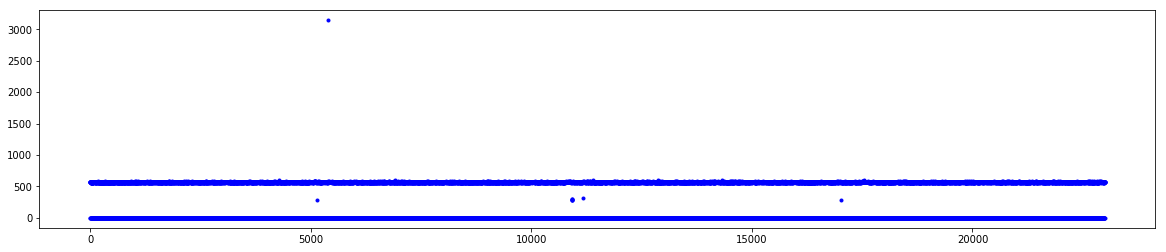

In [21]:
plt.figure(figsize=(20,4)) #size of the figure needs to be set BEFORE plotting (width first, height second)
plt.plot([range(random_pixel_values_over_time.size)],[pixel_values_over_time],'b.') #plotting the pixel over time
plt.show() #showing the plot 

In [49]:
print('Pixel {0}, {1} has mean: {2:.2f} and variance: {3:.2f}'.format(rand_height,rand_width,np.mean(random_pixel_values_over_time),np.var(random_pixel_values_over_time)))
#the index of dispersion is a measure of variance that normalizes by means. Not necessary to calculate here

Pixel 342, 725 has mean: 299.99 and variance: 1135.24


Time elapsed was 194.1160728931427


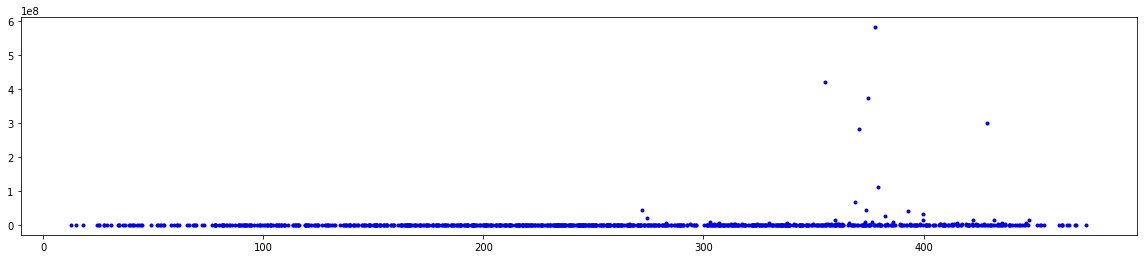

In [68]:
#What I want to do next is to plot the index of dispersion as a function of distance to the center of the bucket. 
start=time.time()
center=[int(video_height/2),int(video_width/2)] #let's say the center of the screen is half way between the height and width
distances_to_center=[] #array to be filled
variance=[] #array to be filled

for i in range(1000):
    rand_height=random.randint(0,video_height-1) #random pixel's height is between 0 and the height of the video
    rand_width=random.randint(0,video_width-1) #random pixel's width is between 0 and the width of the video
    distance= ( abs(rand_height-center[0])**2 + abs(rand_width-center[1])**2 )**.5 #calculating distance of rand pixel to center
    distances_to_center=np.append(distances_to_center,distance) #filling distances to center matrix with each distance
    #i_o_d=np.var(frames[:,463,804])/np.mean(frames[:,rand_height,rand_width]) #doesnt make sense to calculate index of dispersion
    variance=np.append(variance,np.var(frames[:,rand_height,rand_width])) #filling variance matrix with variances that I calculate 
end=time.time()
print('Time elapsed was {0}'.format(end-start))
plt.figure(figsize=(20,4)) #size of the figure needs to be set BEFORE plotting (width first, height second)
plt.plot([distances_to_center],[variance],'b.') #plotting variance as a function of distance to center
plt.show() #showing the plot 

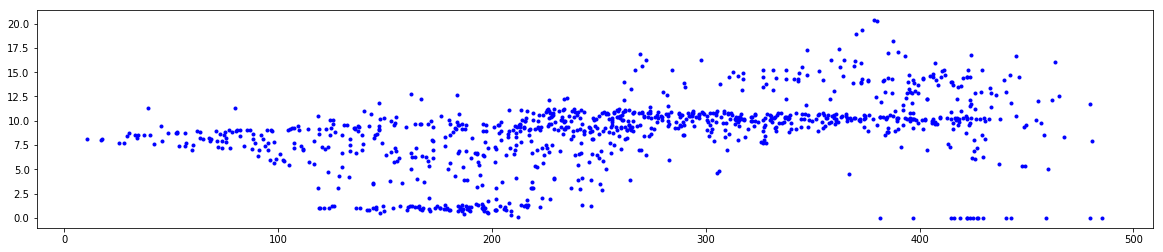

In [70]:
variance[variance==0]=1 #can't take the log of zero so I'm changing 0 variance to 1 before I take the log.
plt.figure(figsize=(20,4)) #size of the figure needs to be set BEFORE plotting (width first, height second)
plt.plot([distances_to_center],[np.log(variance)],'b.') #plotting variance as a function of distance to center
plt.show() #showing the plot 

Time elapsed was 183.0251259803772


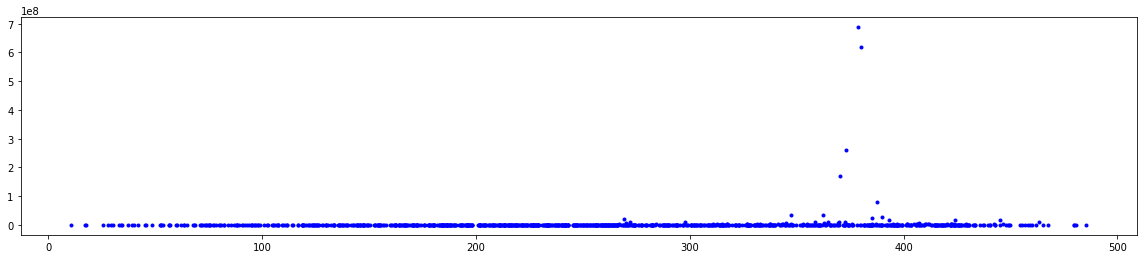

In [69]:
#The better way to do this would obviously be to create and array of zero FIRST instead of creating an empty array and appending
#What I want to do next is to plot the index of dispersion as a function of distance to the center of the bucket. 
start=time.time()
center=[int(video_height/2),int(video_width/2)] #let's say the center of the screen is half way between the height and width
distances_to_center=np.zeros(1000) #array to be filled
variance=np.zeros(1000) #array to be filled

for i in range(1000):
    rand_height=random.randint(0,video_height-1) #random pixel's height is between 0 and the height of the video
    rand_width=random.randint(0,video_width-1) #random pixel's width is between 0 and the width of the video
    distance= ( abs(rand_height-center[0])**2 + abs(rand_width-center[1])**2 )**.5 #calculating distance of rand pixel to center
    distances_to_center[i]=distance #filling distances to center matrix with each distance
    #i_o_d=np.var(frames[:,463,804])/np.mean(frames[:,rand_height,rand_width]) #doesnt make sense to calculate index of dispersion
    variance[i]=np.var(frames[:,rand_height,rand_width]) #filling variance matrix with variances that I calculate 
end=time.time()
print('Time elapsed was {0}'.format(end-start))
plt.figure(figsize=(20,4)) #size of the figure needs to be set BEFORE plotting (width first, height second)
plt.plot([distances_to_center],[variance],'b.') #plotting variance as a function of distance to center
plt.show() #showing the plot 

Time elapsed was 1326.5202219486237


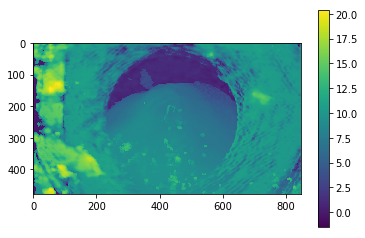

In [14]:
#Creating a heatmap of the pixel variance
start=time.time()
center=[int(video_height/2),int(video_width/2)] #let's say the center of the screen is half way between the height and width
variance=np.zeros([video_height,video_width]) #array to be filled
for i in range(video_height):
    for j in range(video_width):
        variance[i,j]=np.var(frames[:,i,j])
end=time.time()
print('Time elapsed was {0}'.format(end-start))
variance_heatmap=np.expand_dims(variance,axis=0)
variance_heatmap[variance_heatmap==0]=1
log_variance_heatmap=np.log(variance_heatmap)
variance_hm=plt.colorbar(plt.imshow(log_variance_heatmap[0]))

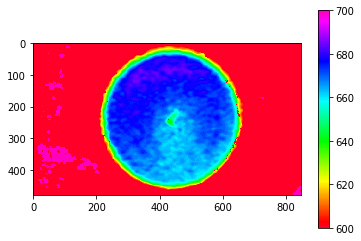

In [15]:
#plt.colorbar(plt.imshow(reshaped[51],cmap='jet'))
plt.colorbar(plt.imshow(frames[51],cmap='gist_rainbow'))
plt.clim(600,700)

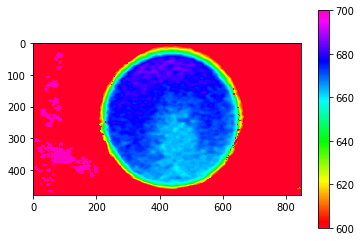

In [141]:
plt.colorbar(plt.imshow(reshaped[5350],cmap='gist_rainbow'))
plt.clim(600,700)

In [16]:
background=np.mean(frames[5300:5350], axis=0)
#backgroundvar=np.var(reshaped[0],reshaped[1],reshaped[2],reshaped[3])

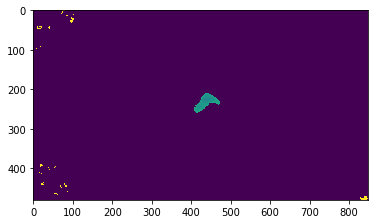

In [18]:
#Now let's try to put this all together but in another random frame
#pick a frame
picked_frame=18000
frame_of_interest=frames[picked_frame] 
#know your background (I happen to know background is between frame 5250 and 5350)
backgroundmean=np.mean(frames[5250:5350], axis=0)
backgroundvariance=np.var(frames[5250:5350], axis=0)
#if the difference between the background and the frame is greater than expected, it's probably our object! 
#note that I arbitrarily pick 5 stdeviations away, it's worth knowing if the noise is actually gaussian
backgroundmultiplier=np.abs(frame_of_interest - backgroundmean) - (5*np.sqrt(backgroundvariance)) #if its 5 standard its NOISE
#we expect positive values for high differences. make them stay by multiplying by 1
backgroundmultiplier[backgroundmultiplier>0]=1
#we expect negative values or no change for small differences. probably just noise, get rid of them by multiplying by 0
backgroundmultiplier[backgroundmultiplier<=0]=0
#apply our expectations to the matrix
frame_of_interest_backgroundsubtracted=np.multiply(frame_of_interest,backgroundmultiplier)

#I can plot the background subtracted image
plt.imshow(frame_of_interest_backgroundsubtracted)
plt.clim(600,700)


233
479


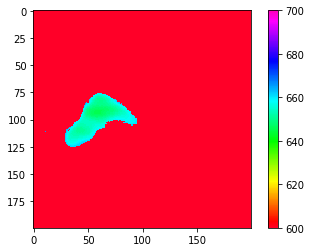

In [19]:
#Now let's find the object! Below, I'm looking for the rows and columns with the least non zero values

winningrow=0
winningcountr=width
for rowpixels in range(0,height):
    currentcountr=np.count_nonzero(frame_of_interest_backgroundsubtracted[rowpixels,:]==0)
    if currentcountr<winningcountr:
        winningcountr=currentcountr
        winningrow=rowpixels
print(winningrow) 

winningcolumn=0
winningcountc=height
for columnpixels in range(0,width):
    currentcountc=np.count_nonzero(frame_of_interest_backgroundsubtracted[:,columnpixels]==0)
    if currentcountc<winningcountc:
        winningcountc=currentcountc
        winningcolumn=rowpixels
print(winningcolumn)  

#An I can also plot the image cropped according to the least number of zero rows/columns "algorithim"
frame_of_interest_backgroundsubtracted_zoomed=frame_of_interest_backgroundsubtracted[winningrow-100:winningrow+100,winningcolumn-100:winningcolumn+100]
plt.colorbar(plt.imshow(frame_of_interest_backgroundsubtracted_zoomed,cmap='gist_rainbow'))
plt.clim(600,700)
